In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df1a = pd.read_csv('cw1a.csv', comment = "#")
df1b = pd.read_csv('cw1b.csv', comment = "#")

df1a['Ic (A)'] = df1a['Ic (A)'].where(df1a['Ic (A)'] != 0, df1b['Ic (A)'])
df = df1a
df['delta Ic (A)'] = np.insert(np.diff(df['Ic (A)']), len(df['Ic (A)']) - 1, np.nan)
df['delta Vbe (V)'] = np.insert(np.diff(df['Vbe (V)']), len(df['Vbe (V)']) - 1, np.nan)
df['delta Ib (A)'] = np.insert(np.diff(df['Ib (A)']), len(df['Ib (A)']) - 1, np.nan)
df = df.drop(df.index[-1])

Vt = 26/1000

In [8]:
r_be_def = abs(df['delta Vbe (V)']/df['Ib (A)'])
beta = abs(df['delta Ic (A)'][82:]/df['delta Ib (A)'][82:])
gm = abs(df['Ic (A)'][82:]/Vt)
r_be_lowsignal = beta/gm

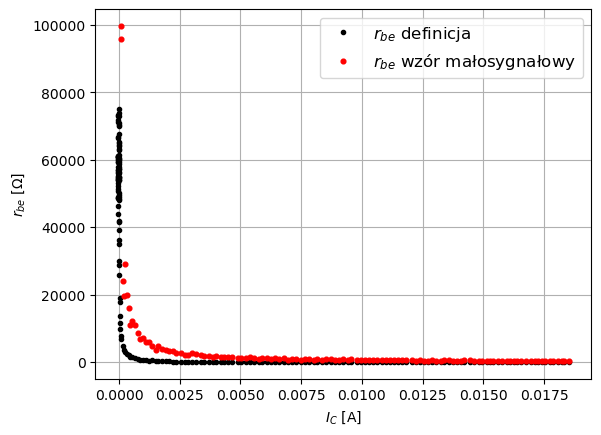

In [9]:
plt.plot(df['Ic (A)'], r_be_def, color = 'black', marker = 'o', linestyle = '', label = r'$r_{be}$ definicja', markersize = 3)
plt.plot(df['Ic (A)'][82:], r_be_lowsignal, color = 'red', marker = 'o', linestyle = '', label = r'$r_{be}$ wzór małosygnałowy', markersize = 3.4)
plt.xlabel(r'$I_{C}$ [A]')
plt.ylabel(r'$r_{be}$ [$\Omega$]')
plt.legend(fontsize = 12)
plt.grid(True)

In [10]:
df.to_csv('data_merged.csv', index = False)